In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('county-level-gdp-data.csv', encoding='ISO-8859-1')

### Data Overview

In [75]:
### Percentage Contribution of the Sector in North Dakota# 1. General Overview
print("General Overview:")
print(f"Total Rows: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}\n")

# 2. Data Types and Missing Values
print("Data Types and Missing Values:")
print(data.info())
print("\n")

# 3. Summary Statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(data.describe())
print("\n")

# 4. Unique Values in Categorical Columns
print("Unique Values in Categorical Columns:")
for column in ['County_Name', 'State_Name']:
    print(f"{column}: {data[column].nunique()} unique values")

# 5. Yearly Distribution
if 'TimePeriod' in data.columns:
    print("\nYearly Distribution:")
    print(data['TimePeriod'].value_counts().sort_index())
else:
    print("\nTimePeriod column not found.")


General Overview:
Total Rows: 62360
Total Columns: 39

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62360 entries, 0 to 62359
Data columns (total 39 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   GeoFips                                                                   62360 non-null  int64  
 1   County_Name                                                               61780 non-null  object 
 2   State_Name                                                                61780 non-null  object 
 3   County_Area_SQMI                                                          61780 non-null  float64
 4   TimePeriod                                                                62360 non-null  int64  
 5   Accommodation and food services                                           62360

### Contribution of the "Mining, quarrying, and oil and gas extraction" Sector by State

In [76]:
oil_and_gas = data[['GeoFips', 'County_Name', 'State_Name', 'County_Area_SQMI', 'TimePeriod', 'Mining, quarrying, and oil and gas extraction', 'All industry total']].copy()
oil_and_gas.loc[:, 'Mining, quarrying, and oil and gas extraction'] = pd.to_numeric(
    oil_and_gas['Mining, quarrying, and oil and gas extraction'].str.replace(',', '').str.replace('(D)', 'NaN', regex=True),
    errors='coerce'
)

oil_and_gas.loc[:, 'All industry total'] = pd.to_numeric(
    oil_and_gas['All industry total'].str.replace(',', '').str.replace('(D)', 'NaN', regex=True),
    errors='coerce'
)

In [77]:
statewise_contribution = oil_and_gas.groupby('State_Name')[['Mining, quarrying, and oil and gas extraction', 'All industry total']].sum().reset_index()
statewise_contribution_sorted = statewise_contribution.sort_values(by='Mining, quarrying, and oil and gas extraction', ascending=False).reset_index(drop=True)
statewise_contribution_sorted.head(15)

,State_Name,"Mining, quarrying, and oil and gas extraction",All industry total
0,Texas,3.232168e+09,2.774732e+10
1,Oklahoma,5.391340e+08,3.352656e+09
2,Louisiana,3.779619e+08,4.619186e+09
3,California,3.444066e+08,4.315795e+10
4,Colorado,2.889292e+08,5.672732e+09
5,Alaska,2.683944e+08,1.023582e+09
6,Wyoming,2.162843e+08,7.452211e+08
7,Pennsylvania,2.067344e+08,1.271298e+10
8,New Mexico,1.887057e+08,1.727439e+09
9,West Virginia,1.877337e+08,1.368648e+09


In [78]:
statewise_contribution_sorted.to_csv('statewise_contribution.csv')

### Percentage Contribution of the Sector by State

In [79]:
statewise_contribution['Percentage share'] = (statewise_contribution['Mining, quarrying, and oil and gas extraction'] / statewise_contribution['All industry total']) * 100
statewise_contribution_sorted_by_share = statewise_contribution.sort_values(by='Percentage share', ascending=False).reset_index(drop=True)
statewise_contribution_sorted_by_share.head(10)

,State_Name,"Mining, quarrying, and oil and gas extraction",All industry total,Percentage share
0,Wyoming,2.162843e+08,7.452211e+08,29.022833
1,Alaska,2.683944e+08,1.023582e+09,26.221095
2,Oklahoma,5.391340e+08,3.352656e+09,16.080803
3,North Dakota,1.179569e+08,8.438376e+08,13.978624
4,West Virginia,1.877337e+08,1.368648e+09,13.716726
5,Texas,3.232168e+09,2.774732e+10,11.648577
6,New Mexico,1.887057e+08,1.727439e+09,10.924011
7,Louisiana,3.779619e+08,4.619186e+09,8.182434
8,Montana,4.742884e+07,8.166801e+08,5.807518
9,Colorado,2.889292e+08,5.672732e+09,5.093299


In [80]:
statewise_contribution_sorted_by_share.to_csv('statewise_percentage_contribution.csv')

### Contribution of the Sector by County

In [81]:
countywise_contribution = oil_and_gas.groupby(['State_Name', 'County_Name'])['Mining, quarrying, and oil and gas extraction'].sum().reset_index()
countywise_contribution_sorted = countywise_contribution.sort_values(by='Mining, quarrying, and oil and gas extraction', ascending=False).reset_index(drop=True)
countywise_contribution_sorted.head(10)

,State_Name,County_Name,"Mining, quarrying, and oil and gas extraction"
0,Texas,Harris,462454056.0
1,Oklahoma,Oklahoma,218238355.0
2,Alaska,North Slope,208028429.0
3,California,Kern,204309819.0
4,Texas,Midland,157112911.0
5,Oklahoma,Tulsa,103811159.0
6,Texas,Karnes,90975117.0
7,Colorado,Weld,85411100.0
8,Wyoming,Campbell,78464055.0
9,Texas,Tarrant,76830400.0


In [82]:
countywise_contribution_sorted.to_csv('countywise_contribution.csv')

### Percentage Contribution of the Sector in North Dakota

In [83]:
north_dakota_data = oil_and_gas[oil_and_gas['State_Name'] == 'North Dakota']
north_dakota_summary = north_dakota_data.groupby('County_Name').agg({
    'Mining, quarrying, and oil and gas extraction': 'sum',
    'All industry total': 'sum'
}).reset_index()
north_dakota_summary['Percentage Share'] = (north_dakota_summary['Mining, quarrying, and oil and gas extraction'] / north_dakota_summary['All industry total']) * 100
north_dakota_summary_sorted = north_dakota_summary.sort_values(by='Percentage Share', ascending=False).reset_index(drop=True)
north_dakota_summary_sorted.head()

,County_Name,"Mining, quarrying, and oil and gas extraction",All industry total,Percentage Share
0,Dunn,11990877.0,14205781.0,84.408432
1,McKenzie,26000667.0,35295688.0,73.665279
2,Mountrail,15408131.0,23025505.0,66.917668
3,Williams,33514698.0,71497757.0,46.875174
4,Billings,950090.0,2128968.0,44.626786


In [84]:
north_dakota_summary_sorted.to_csv('north_dakota_summary.csv')

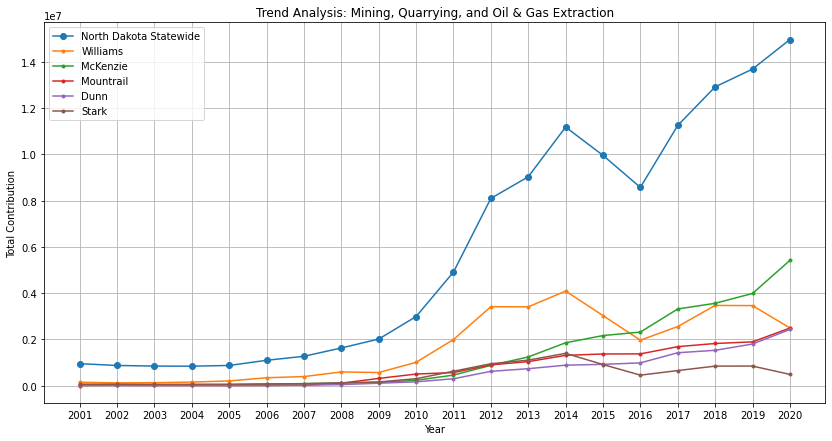

In [85]:
nd_total_by_county = north_dakota_data.groupby('County_Name')['Mining, quarrying, and oil and gas extraction'].sum().reset_index()
top_5_counties = nd_total_by_county.sort_values(by='Mining, quarrying, and oil and gas extraction', ascending=False).head(5)['County_Name']
top_5_data = north_dakota_data[north_dakota_data['County_Name'].isin(top_5_counties)]
statewide_trend = north_dakota_data.groupby('TimePeriod')['Mining, quarrying, and oil and gas extraction'].sum()

plt.figure(figsize=(14, 7))
plt.plot(statewide_trend.index, statewide_trend.values, label='North Dakota Statewide', marker='o')
for county in top_5_counties:
    county_data = top_5_data[top_5_data['County_Name'] == county]
    county_trend = county_data.groupby('TimePeriod')['Mining, quarrying, and oil and gas extraction'].sum()
    plt.plot(county_trend.index, county_trend.values, label=county, marker='.')

plt.title('Trend Analysis: Mining, Quarrying, and Oil & Gas Extraction')
plt.xticks(np.arange(min(statewide_trend.index), max(statewide_trend.index)+1), rotation=0)
plt.xlabel('Year')
plt.ylabel('Total Contribution')
plt.legend()
plt.grid(True)
plt.show()